In [1]:
from pipeline import Pipeline, Process, Postprocess, Preprocess
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [2]:
class MyPreProcess(Preprocess):
    process_desc = "Exemple de pre-process -> ne fait rien"
    def run(self, images):
        pass


class MyProcess(Process):
    process_desc = "Exemple de process -> ne fait rien"
    def run(self, images):
        pass
    
    
class MyPostProcess(Postprocess):
    process_desc = "Exemple de post-process -> ne fait rien"
    def run(self, images):
        pass

In [3]:
pipeline = Pipeline()
process_array = np.array([MyPreProcess()
                          ,MyProcess()
                          ,MyPostProcess()
                          ,MyPreProcess(verbose=0)])
pipeline.add_processes(process_array)

Preprocess :  Exemple de pre-process -> ne fait rien
Process :  Exemple de process -> ne fait rien
Postprocess :  Exemple de post-process -> ne fait rien
Exemple de pre-process -> ne fait rien a été ajouté.
Exemple de process -> ne fait rien a été ajouté.
Exemple de post-process -> ne fait rien a été ajouté.
Exemple de pre-process -> ne fait rien a été ajouté.


In [4]:
pipeline.print_process()

Exemple de pre-process -> ne fait rien
Exemple de pre-process -> ne fait rien
Exemple de process -> ne fait rien
Exemple de post-process -> ne fait rien


In [5]:
data = pd.read_csv('./../data/SEATGURU_INFO_AIRCRAFT.csv', sep = ';')
data.index = range(2, len(data) + 2)

In [6]:
data.head()

,Data_Source,Airline_name,Aircraft_Type,Category,Flight_Type,Count,Total_seat,Seat_Class,Seat_Type,Seat_Position,...,Width,Bedlength_maximum,Bedlength_minimum,Music,VideoType,Power_available,Power_kind,Usb_available,Usb_kind,Rating
2,SeatGuru,aegean-airlines,Airbus A319-100,ECONOMY,short haul,138,138,Economy,STANDARD,BULKHEAD,...,18.0,NaN,NaN,NONE,NONE,NONE,NaN,NONE,NaN,2
3,SeatGuru,aegean-airlines,Airbus A319-100,ECONOMY,short haul,138,138,Economy,STANDARD,NORMAL,...,18.0,NaN,NaN,NONE,NONE,NONE,NaN,NONE,NaN,2
4,SeatGuru,aegean-airlines,Airbus A319-100,ECONOMY,short haul,138,138,Economy,STANDARD,EXIT_ROW,...,18.0,NaN,NaN,NONE,NONE,NONE,NaN,NONE,NaN,5
5,SeatGuru,aegean-airlines,Airbus A319-100,ECONOMY,short haul,138,138,Economy,STANDARD,NORMAL,...,18.0,NaN,NaN,NONE,NONE,NONE,NaN,NONE,NaN,3
6,SeatGuru,aegean-airlines,Airbus A319-100,ECONOMY,short haul,138,138,Economy,STANDARD,NORMAL,...,18.0,NaN,NaN,NONE,NONE,NONE,NaN,NONE,NaN,1


In [7]:
data.columns

Index(['Data_Source', 'Airline_name', 'Aircraft_Type', 'Category',
       'Flight_Type', 'Count', 'Total_seat', 'Seat_Class', 'Seat_Type',
       'Seat_Position', 'Recline', 'Premium', 'Pitch_minimum', 'Pitch_maximum',
       'Width', 'Bedlength_maximum', 'Bedlength_minimum', 'Music', 'VideoType',
       'Power_available', 'Power_kind', 'Usb_available', 'Usb_kind', 'Rating'],
      dtype='object')

### Création CSV avec les images et les lignes correspondantes

In [8]:
data['airline_aircraft'] = data.apply(lambda x: x['Airline_name'].replace('-', '_') + '_' + x['Aircraft_Type'].replace(' ', '_'), axis = 'columns')
liste_image = os.listdir('./../data/LAYOUT SEATGURU/')
l_result = []
for i in liste_image:
    for j in data['airline_aircraft'].unique():
        if j.lower() in i.lower():
            l_result.append((i, j))

new_df = pd.DataFrame(list(zip([i[0] for i in l_result], [i[1] for i in l_result])), columns =['image', 'avion'])

In [9]:
df_temp = new_df[['avion', 'image']]

In [10]:
df_temp = pd.DataFrame([list(data.groupby('airline_aircraft').groups.keys()), [list(i) for i in list(data.groupby('airline_aircraft').groups.values())]], index = ['avion', 'lignes']).T

In [11]:
df_temp = df_temp.sort_values('lignes').reset_index(drop = True)

In [12]:
new_df = new_df.merge(df_temp, how='outer', on='avion').dropna()

In [13]:
new_df.drop('avion', axis = 'columns', inplace = True)

In [14]:
new_df.head()

,image,lignes
0,Aegean_Airlines_Airbus_A319-100_plane1.svg.png,"[2, 3, 4, 5, 6]"
1,Aegean_Airlines_Airbus_A320-200_plane2.svg.png,"[7, 8, 9, 10, 11, 12]"
2,Aegean_Airlines_Airbus_A321-200_plane1.svg.png,"[13, 14, 15, 16, 17, 18, 19]"
3,Aegean_Airlines_Airbus_A321-200_plane3.svg.png,"[13, 14, 15, 16, 17, 18, 19]"
4,Aegean_Airlines_ATR_42-600_plane2.svg.png,"[20, 21, 22, 23, 24]"


In [ ]:
# new_df.to_csv('./../data/Image_lignes.csv', sep = ';')

### Template Matching

In [ ]:
path = './../data/LAYOUT SEATGURU/'
df = pd.DataFrame({'img': os.listdir('./../data/LAYOUT SEATGURU/'), 'chemin': [path + img_name for img_name in os.listdir('./../data/LAYOUT SEATGURU/')]})

In [ ]:
df.head(10)

In [ ]:
df[df['img'] == 'Qatar_Airways_Boeing_777-300ER_plane737.svg.png']

In [ ]:
df['chemin'][8]

In [ ]:
img = plt.imread(df['chemin'][8])
figure = plt.figure(figsize = (10, 15))
plt.imshow(img)

In [ ]:
# Read the main image 
img_rgb = cv2.imread('./../data/LAYOUT SEATGURU/Qatar_Airways_Boeing_777-300ER_plane737.svg.png')
  
# Convert it to grayscale 
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
  
# Read the template
template = cv2.imread('./images/temp_normal_seat.jpg', 0)    # Restaurant
# template = cv2.imread('./images/temp_normal_seat.jpg', 0)    # Siège

# Store width and height of template in w and h 
w, h = template.shape[::-1]
  
# Perform match operations. 
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
  
# Specify a threshold 
threshold = 0.35
  
# Store the coordinates of matched area in a numpy array 
loc = np.where( res >= threshold)
  
# Draw a rectangle around the matched region. 
for pt in zip(*loc[::-1]): 
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,255,255), 2)
    print('oui')

# Show the final image with the matched area. 
cv2.imshow('Detected', img_rgb)
cv2.waitKey(0)

In [ ]:
img_rgb = cv2.imread('./../data/LAYOUT SEATGURU/Aeroflot_Russian_Airlines_Airbus_330_200_plane3.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('./images/templateTest.jpg', 0)
w, h = template.shape[::-1]

cv2.imshow('template', template)
cv2.waitKey(0)

res = cv2.matchTemplate(img_gray,template,cv2.TM_CCORR_NORMED)
threshold = 0.8
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 2)
    print('i')

cv2.imwrite('res.png',img_rgb)
cv2.imshow('img_rgb', img_rgb)
cv2.waitKey(0)

### Multiple Scale Template Matching

In [ ]:
import numpy as np
import argparse
import imutils
import glob
import cv2

In [ ]:
image_debut = './../data/LAYOUT SEATGURU/Aeroflot_Russian_Airlines_Airbus_330_200_plane3.jpg'
template_base = './images/templateBusinessElectricity.jpg'

In [ ]:
# Python program to illustrate  
# multiscaling in template matching 
import cv2 
import numpy as np 
   
# Read the main image 
img_rgb = cv2.imread(image_debut) 
   
# Convert to grayscale 
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY) 
   
# Read the template 
template = cv2.imread(template_base, 0) 
   
# Store width and height of template in w and h 
w, h = template.shape[::-1] 
found = None
  
for scale in np.linspace(0.2, 1.0, 20)[::-1]: 
  
    # resize the image according to the scale, and keep track 
    # of the ratio of the resizing 
    resized = imutils.resize(img_gray, width = int(img_gray.shape[1] * scale)) 
    r = img_gray.shape[1] / float(resized.shape[1]) 
   
    # if the resized image is smaller than the template, then break 
    # from the loop 
    # detect edges in the resized, grayscale image and apply template  
    # matching to find the template in the image edged  
    # = cv2.Canny(resized, 50, 200) result = cv2.matchTemplate(edged, template, 
    # cv2.TM_CCOEFF) (_, maxVal, _, maxLoc) = cv2.minMaxLoc(result) 
    # if we have found a new maximum correlation value, then update 
    # the found variable if found is None or maxVal > found[0]: 
    if resized.shape[0] < h or resized.shape[1] < w: 
            break
    found = (maxVal, maxLoc, r) 

# unpack the found varaible and compute the (x, y) coordinates 
# of the bounding box based on the resized ratio 
(_, maxLoc, r) = found 
(startX, startY) = (int(maxLoc[0] * r), int(maxLoc[1] * r)) 
(endX, endY) = (int((maxLoc[0] + tW) * r), int((maxLoc[1] + tH) * r)) 
  
# draw a bounding box around the detected result and display the image 
cv2.rectangle(image, (startX, startY), (endX, endY), (0, 0, 255), 2) 
cv2.imshow("Image", image)
cv2.waitKey(0)

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
# print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
%matplotlib inline

np.random.seed(2)

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau


sns.set(style='white', context='notebook', palette='deep')

# Load the data
train = pd.read_csv("../input/train.csv")
test = pd.read_csv("../input/test.csv")

Y_train = train["label"]

# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 

# free some space
del train 

g = sns.countplot(Y_train)

Y_train.value_counts()

# Normalize the data
X_train = X_train / 255.0
test = test / 255.0

# Reshape image in 3 dimensions (height = 28px, width = 28px , canal = 1)
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

# Encode labels to one hot vectors (ex : 2 -> [0,0,1,0,0,0,0,0,0,0])
Y_train = to_categorical(Y_train, num_classes = 10)

# Set the random seed
random_seed = 2

# Split the train and the validation set for the fitting
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

# Set the CNN model 
# my CNN architechture is In -> [[Conv2D->relu]*2 -> MaxPool2D -> Dropout]*2 -> Flatten -> Dense -> Dropout -> Out

model = Sequential()

model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))


model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

# Define the optimizer
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

# Set a learning rate annealer
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
                                            
epochs = 1 # Turn epochs to 30 to get 0.9967 accuracy
batch_size = 86

# With data augmentation to prevent overfitting (accuracy 0.99286)

# datagen = ImageDataGenerator(
#         featurewise_center=False,  # set input mean to 0 over the dataset
#         samplewise_center=False,  # set each sample mean to 0
#         featurewise_std_normalization=False,  # divide inputs by std of the dataset
#         samplewise_std_normalization=False,  # divide each input by its std
#         zca_whitening=False,  # apply ZCA whitening
#         rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
#         zoom_range = 0.1, # Randomly zoom image 
#         width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
#         height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
#         horizontal_flip=False,  # randomly flip images
#         vertical_flip=False)  # randomly flip images


# datagen.fit(X_train)

# Fit the model
# history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
#                               epochs = epochs, validation_data = (X_val,Y_val),
#                               verbose = 2, steps_per_epoch=X_train.shape[0] // batch_size
#                               , callbacks=[learning_rate_reduction])
                              
# Plot the loss and accuracy curves for training and validation 
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'], color='b', label="Training loss")
ax[0].plot(history.history['val_loss'], color='r', label="validation loss",axes =ax[0])
legend = ax[0].legend(loc='best', shadow=True)

ax[1].plot(history.history['acc'], color='b', label="Training accuracy")
ax[1].plot(history.history['val_acc'], color='r',label="Validation accuracy")
legend = ax[1].legend(loc='best', shadow=True)

### Post Process

#### Aligner les points et supprimer les doublons

In [28]:
from pipeline import Pipeline, Process, Postprocess, Preprocess
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import sklearn
from sklearn.cluster import DBSCAN

In [29]:
new_df[new_df['image'] == 'Aer_Lingus_Airbus_A330-200_plane4.jpg']

,image,lignes
40,Aer_Lingus_Airbus_A330-200_plane4.jpg,"[248, 249, 250, 251, 252, 253, 254, 255, 256, ..."


In [30]:
# align all coordinates of the pixels
def align(liste):
    # First two lines if the first list is a list of tuples
#     liste_x = [i[0] for i in liste]
#     liste_y = [i[1] for i in liste]
    # Separate x and y if we have a list of numbers like [x1, y1, x2, y2, ...]
    liste_x = [liste[i] for i in range(len(liste)) if i % 2 == 0]
    liste_y = [liste[i] for i in range(len(liste)) if i % 2 == 1]
    
    serie_x = pd.Series(liste_x).value_counts().sort_index()
    serie_y = pd.Series(liste_y).value_counts().sort_index()
    
    px_rare_x = list(serie_x.loc[serie_x <= 3].index)
    px_nb_x = list(serie_x.loc[serie_x > 3].index)
    
    px_rare_y = list(serie_y.loc[serie_y <= 3].index)
    px_nb_y = list(serie_y.loc[serie_y > 3].index)
    
    for i in range(len(liste_x)):
        if liste_x[i] in px_rare_x:
            liste_dist = list(abs(np.array(px_nb_x) - liste_x[i]))
            index = liste_dist.index(min(liste_dist))
            liste_x[i] = px_nb_x[index]
        if liste_y[i] in px_rare_y:
            liste_dist = list(abs(np.array(px_nb_y) - liste_y[i]))
            index = liste_dist.index(min(liste_dist))
            liste_y[i] = px_nb_y[index]
    
    liste_coord = zip(liste_x, liste_y)
    return list(liste_coord)

In [31]:
# def find_duplicate(coordinate: list):
#     """Documentation
#     Parameters:
#         coordinate: original coordinates without treatment
#     Out:
#         dup: list of coordinate which are duplicated
#     """
#     dup = []
#     for coord in coordinate:
#         for i in coordinate:
#             for j in range(5):
#                 if (coord[0] == i[0]+j or coord[0] == i[0]-j or coord[0] == i[0]) and (coord[1] == i[1]+j or coord[1] == i[1]-j or coord[1] == i[1]) and (coord != i):
#                     dup.append(i)
#     return(dup)

In [322]:
def find_duplicate(coordinate: list):
    """Documentation
    Parameters:
        coordinate: original coordinates without treatment
    Out:
        dup: list of coordinate which are duplicated
    """
    dup = []
    for point1 in coordinate:
        for point2 in coordinate:
            if point2 != point1 and point1 not in dup:
                if ((abs(point1[0] - point2[0]) <= 5) and (abs(point1[1] - point2[1]) <= 5)):
                    dup.append(point2)
    for d in dup:
        coordinate.remove(d)
    return(coordinate)

[1, 2]

In [312]:
# def remove_duplicate(dup: list, liste_with_dup: list):
#     """Documentation
#     Parameters:
#         dup: t of coordinate which are duplicated
#         liste_with_dup: original coordinates without treatment
#     Out:
#         liste_with_dup: list of coordinate whithout duplication
#     """
#     for d in dup:
#         liste_with_dup.remove(d)
#     return (liste_with_dup)

In [32]:
# def remove_duplicate(dup: list, liste_with_dup: list):
#     """Documentation
#     Parameters:
#         dup: t of coordinate which are duplicated
#         liste_with_dup: original coordinates without treatment
#     Out:
#         liste_with_dup: list of coordinate whithout duplication
#     """
#     while dup:
#         del liste_with_dup[liste_with_dup.index(dup[0])]
#         dup = find_duplicate(liste_with_dup)
#     return(liste_with_dup)

In [255]:
def clusters_to_rect(dbscan: sklearn.cluster.dbscan_.DBSCAN, array_wo_dup: np.array):
    """Documentation
    Parameters:
        dbscan: result of the clustering with DBSCAN
    Out:
        list_rect: list of rectangles representing each cluster
    """
    list_coord = array_wo_dup
    label_groups = pd.Series(dbscan.labels_).unique()
    list_rect = []  # to plot with plt.patches
    list_rect2 = []  # all corners of the rectangles
    HEIGHT: int = 19
    WIDTH: int = 13
    for group in label_groups:
        index = [i for i, x in enumerate(list(dbscan.labels_)) if x == group]
        points_cluster = list_coord[index]
        corner_bottom_right = (max(i[0] for i in points_cluster) + WIDTH, min(
            i[1] for i in points_cluster) - HEIGHT)
        corner_top_right = (max(i[0] for i in points_cluster) + WIDTH, max(
            i[1] for i in points_cluster))
        corner_top_left = (min(i[0] for i in points_cluster), max(
            i[1] for i in points_cluster))
        corner_bottom_left = (min(i[0] for i in points_cluster), min(
            i[1] for i in points_cluster) - HEIGHT)
        height = corner_top_right[1] - corner_bottom_right[1]
        width = corner_bottom_right[0] - corner_bottom_left[0]
        list_rect.append(((corner_bottom_left), width, height))
        list_rect2.append(
            (corner_bottom_left, corner_top_left, corner_top_right, corner_bottom_right))
    return list_rect, list_rect2

In [300]:
liste_coord = [146, 517,
133, 537,
146, 537,
185, 537,
198, 537,
211, 537,
224, 537,
263, 537,
276, 537,
133, 557,
146, 557,
185, 557,
198, 557,
211, 557,
224, 557,
263, 557,
276, 557,
133, 577,
146, 577,
185, 577,
198, 577,
211, 577,
224, 577,
263, 577,
276, 577,
133, 597,
146, 597,
185, 597,
198, 597,
211, 597,
224, 597,
263, 597,
276, 597,
133, 617,
146, 617,
185, 617,
198, 617,
211, 617,
224, 617,
263, 617,
276, 617,
133, 637,
146, 637,
185, 637,
198, 637,
211, 637,
224, 637,
263, 637,
276, 637,
133, 657,
146, 657,
185, 657,
198, 657,
211, 657,
224, 657,
263, 657,
276, 657,
133, 677,
146, 677,
185, 677,
198, 677,
211, 677,
224, 677,
263, 677,
276, 677,
133, 697,
146, 697,
185, 697,
198, 697,
211, 697,
224, 697,
263, 697,
276, 697,
133, 717,
146, 717,
185, 717,
198, 717,
211, 717,
224, 717,
263, 717,
276, 717,
133, 737,
146, 737,
185, 737,
198, 737,
211, 737,
224, 737,
263, 737,
276, 737,
133, 757,
146, 757,
185, 757,
198, 757,
211, 757,
224, 757,
263, 757,
276, 757,
133, 777,
146, 777,
185, 777,
198, 777,
211, 777,
224, 777,
263, 777,
276, 777,
133, 797,
146, 797,
185, 797,
198, 797,
211, 797,
224, 797,
263, 797,
276, 797,
133, 817,
146, 817,
185, 817,
198, 817,
211, 817,
224, 817,
263, 817,
276, 817,
133, 837,
146, 837,
185, 837,
198, 837,
211, 837,
224, 837,
263, 837,
276, 837,
133, 857,
146, 857,
263, 857,
276, 857,
133, 971,
146, 971,
185, 971,
198, 971,
211, 971,
224, 971,
263, 971,
276, 971,
133, 991,
146, 991,
185, 991,
198, 991,
211, 991,
224, 991,
263, 991,
276, 991,
133, 1011,
146, 1011,
185, 1011,
198, 1011,
211, 1011,
224, 1011,
263, 1011,
276, 1011,
133, 1031,
146, 1031,
185, 1031,
198, 1031,
211, 1031,
224, 1031,
263, 1031,
276, 1031,
133, 1051,
146, 1051,
185, 1051,
198, 1051,
211, 1051,
224, 1051,
263, 1051,
276, 1051,
133, 1071,
146, 1071,
185, 1071,
198, 1071,
211, 1071,
224, 1071,
263, 1071,
276, 1071,
133, 1091,
146, 1091,
185, 1091,
198, 1091,
211, 1091,
224, 1091,
263, 1091,
276, 1091,
133, 1111,
146, 1111,
185, 1111,
198, 1111,
211, 1111,
224, 1111,
263, 1111,
276, 1111,
133, 1131,
146, 1131,
185, 1131,
198, 1131,
211, 1131,
224, 1131,
263, 1131,
276, 1131,
135, 1151,
148, 1151,
261, 1151,
274, 1151,
137, 1171,
150, 1171,
191, 1171,
204, 1171,
217, 1171,
259, 1171,
272, 1171,
139, 1191,
152, 1191,
191, 1191,
204, 1191,
217, 1191]

In [301]:
obstacle = [[(168, 140), (202, 192)],
            [(168, 231), (202, 282)],
            [(213, 280), (228, 295)],
            [(215, 126), (230, 142)],
            [(228, 192), (272, 233)],
            [(239, 131), (273, 171)],
            [(282, 348), (446, 349)],
            [(287, 142), (306, 160)],
            [(287, 185), (306, 203)],
            [(287, 212), (306, 229)],
            [(287, 244), (306, 262)],
            [(287, 271), (306, 288)],
            [(418, 185), (436, 203)],
            [(418, 212), (436, 229)],
            [(422, 142), (440, 160)],
            [(422, 244), (440, 262)],
            [(422, 271), (440, 288)],
            [(463, 122), (478, 138)],
            [(475, 187), (502, 237)],
            [(483, 264), (510, 292)],
            [(489, 306), (1231, 349)],
            [(499, 134), (512, 145)],
            [(499, 147), (512, 158)],
            [(519, 134), (532, 158)],
            [(519, 186), (532, 197)],
            [(519, 199), (532, 210)],
            [(519, 212), (532, 223)],
            [(519, 225), (532, 236)],
            [(519, 264), (532, 289)],
            [(599, 134), (612, 145)],
            [(599, 277), (612, 288)],
            [(839, 147), (852, 158)],
            [(839, 186), (852, 236)],
            [(839, 264), (852, 275)],
            [(855, 184), (884, 239)],
            [(859, 130), (901, 160)],
            [(859, 263), (901, 292)],
            [(916, 284), (931, 299)],
            [(941, 186), (966, 237)],
            [(953, 134), (966, 159)],
            [(953, 264), (966, 288)],
            [(1133, 186), (1146, 197)],
            [(1133, 225), (1146, 236)],
            [(1153, 136), (1166, 160)],
            [(1153, 192), (1166, 230)],
            [(1153, 262), (1166, 286)],
            [(1173, 138), (1186, 162)],
            [(1173, 260), (1186, 284)],
            [(1193, 140), (1206, 164)],
            [(1193, 218), (1206, 230)],
            [(1193, 258), (1206, 283)],
            [(1209, 257), (1236, 292)],
            [(1213, 142), (1226, 167)],
            [(1213, 192), (1226, 230)],
            [(1242, 282), (1257, 297)],
            [(1243, 126), (1258, 139)],
            [(1273, 139), (1345, 191)],
            [(1273, 231), (1345, 283)]]

In [302]:
x = [liste_coord[i] for i in range(len(liste_coord)) if i % 2 == 0]
y = [liste_coord[i] for i in range(len(liste_coord)) if i % 2 == 1]
normal_seat = list(zip(x,y))
len(normal_seat)

221

In [323]:
seat_b = open('./../data/coord-Aer_Lingus_Airbus_A330-200_plane4-BusinessSeats.txt', 'r')
seat_b = seat_b.read()
seat_b = seat_b.replace('\n', ',').replace(' ', '').split(',')
seat_b.remove('')
seat_b = [int(i) for i in seat_b]
x_b = [seat_b[i] for i in range(len(seat_b)) if i % 2 == 0]
y_b = [seat_b[i] for i in range(len(seat_b)) if i % 2 == 1]
business_seat = list(zip(x_b, y_b))

In [326]:
print(len(business_seat))
business_seat = find_duplicate(business_seat)
len(business_seat)

30


30

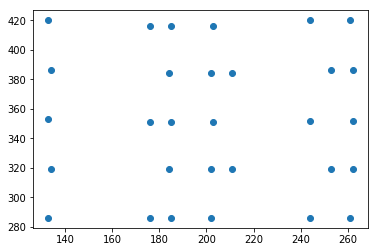

In [327]:
plt.scatter(list(zip(*business_seat))[0], list(zip(*business_seat))[1])

In [230]:
normal_seat = remove_duplicate(find_duplicate(normal_seat), normal_seat)
len(normal_seat)

221

In [231]:
print(len(business_seat))
business_seat = remove_duplicate(find_duplicate(business_seat), business_seat)
x_b = [i[0] for i in business_seat]
y_b = [i[1] for i in business_seat]
len(business_seat)

73


30

###### Clusters

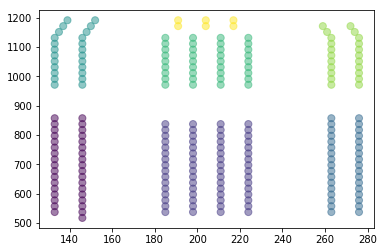

In [232]:
dbscan = DBSCAN(eps=38, min_samples=3).fit(normal_seat)
plt.scatter(x, y, c=dbscan.labels_.astype(float), s=50, alpha=0.5)

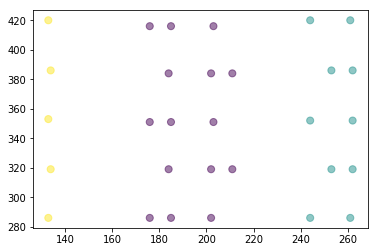

In [233]:
dbscan = DBSCAN(eps=38, min_samples=3).fit(business_seat)
plt.scatter(x_b, y_b, c=dbscan.labels_.astype(float), s=50, alpha=0.5)

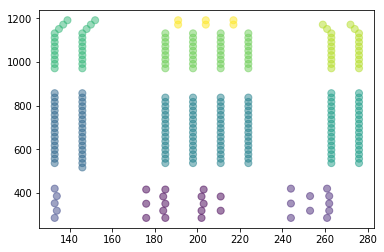

In [234]:
dbscan = DBSCAN(eps=38, min_samples=3).fit(business_seat + normal_seat)
plt.scatter(x_b + x, y_b + y, c=dbscan.labels_.astype(float), s=50, alpha=0.5)

In [235]:
rect_to_plot, corners_rect = clusters_to_rect(dbscan, np.array(business_seat + normal_seat))
rect_to_plot

[((133, 267), 14, 153),
 ((176, 267), 48, 149),
 ((244, 267), 31, 153),
 ((133, 498), 26, 359),
 ((185, 518), 52, 319),
 ((263, 518), 26, 339),
 ((133, 952), 32, 239),
 ((185, 952), 52, 179),
 ((259, 952), 30, 219),
 ((191, 1152), 39, 39)]

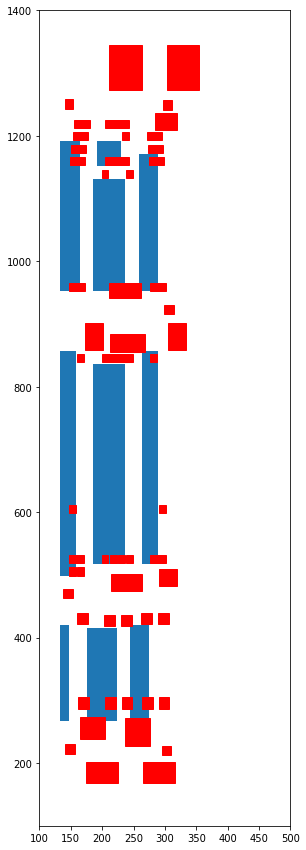

In [236]:
fig1 = plt.figure(figsize = (15,15))
ax1 = fig1.add_subplot(111, aspect='equal')
for rect in rect_to_plot:
    ax1.add_patch(
        patches.Rectangle(rect[0], rect[1], rect[2]))
    
for obs in obstacle:
    ax1.add_patch(
        patches.Rectangle((obs[0][1] - (obs[0][0] - obs[1][0]), obs[0][0] - (obs[0][0] - obs[1][0])), obs[1][1] - obs[0][1], obs[0][0] - obs[1][0], color = 'red'))

    
# x_coord = [i[0][0] for i in rect_to_plot]
# y_coord = [i[0][1] for i in rect_to_plot]
# plt.xlim(min(x_coord)-10,max(x_coord)+rect_to_plot[x_coord.index(max(x_coord))][1]+10)
# plt.ylim(min(y_coord)-10,max(y_coord)+rect_to_plot[y_coord.index(max(y_coord))][2]+10)
plt.xlim(100, 500)
plt.ylim(100, 1400)
plt.show()